In [5]:
import tensorflow as tf

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/d/vikassnwl/frames/frames/train",
    batch_size=32,
    # image_size=(480, 720)
)

Found 17202 files belonging to 7 classes.


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

In [8]:
from functools import partial
import tensorflow as tf
import numpy as np

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    # tf.keras.layers.Input(shape=(480, 720, 3)),
    DefaultConv2D(filters=64, kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=7, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 256, 256, 64)   │         9,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,679,431 (132.29 MB)

 Trainable params: 34,679,431 (132.29 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(normalized_dataset, epochs=20)

Epoch 1/20


I0000 00:00:1733036750.243051      98 service.cc:145] XLA service 0x7b794c00eb50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733036750.243133      98 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/538 ━━━━━━━━━━━━━━━━━━━━ 3:02:41 20s/step - accuracy: 0.1875 - loss: 2.5886

I0000 00:00:1733036768.269369      98 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1733036768.275963      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


538/538 ━━━━━━━━━━━━━━━━━━━━ 97s 143ms/step - accuracy: 0.3065 - loss: 2.3846
Epoch 2/20


I0000 00:00:1733036845.363753      98 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads



538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.7157 - loss: 0.7834
Epoch 3/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.8477 - loss: 0.4461
Epoch 4/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9008 - loss: 0.2911
Epoch 5/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9191 - loss: 0.2456
Epoch 6/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9409 - loss: 0.1859
Epoch 7/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9503 - loss: 0.1531
Epoch 8/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9476 - loss: 0.1546
Epoch 9/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9623 - loss: 0.1212
Epoch 10/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9652 - loss: 0.1093
Epoch 11/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.9698 - loss: 0.0883
Epoch 12/20
538/538 ━━━━━━━━━━━━━━━━━━━━ 66s 123ms/step - accuracy: 0.9726 - loss: 0.0845
Epoch 13/20
538/538 ━━━━━━━━━

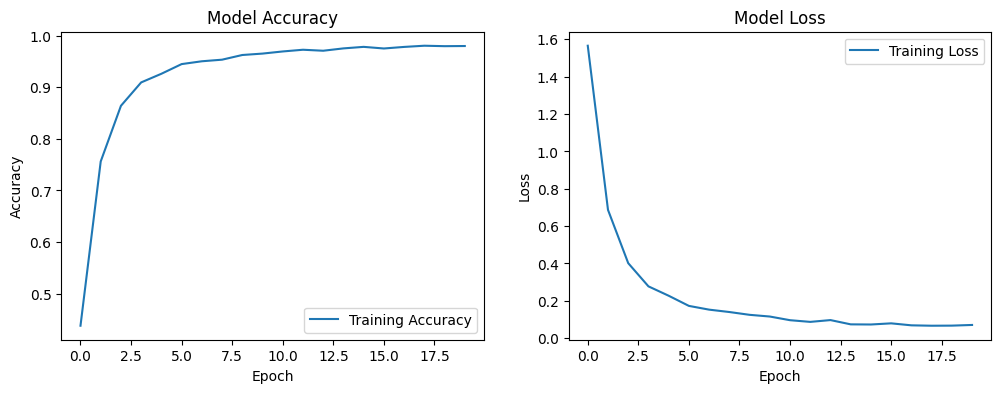

In [12]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by model.fit()
# Plot accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
import tensorflow as tf

# Path to the test set directory
test_dir = '/kaggle/input/d/vikassnwl/frames/frames/test'

# Load the test dataset using image_dataset_from_directory
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size=32,  # adjust the batch size
)

normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
normalized_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(normalized_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 6157 files belonging to 7 classes.
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.7671 - loss: 1.0096
Test Loss: 0.9671160578727722
Test Accuracy: 0.7787883877754211


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
4: Interlock fingers and rub the back of fingers of both hands


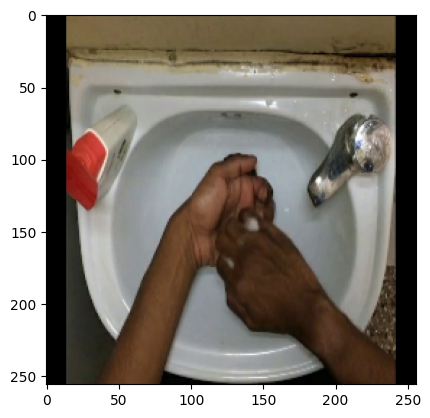

In [17]:
labels_dict = {0: "Rub both wrists in rotating manner",
            1: "Rub your palms together",
            2: "Rub the back of your fingers and hands",
            3: "Rub your hands by interlocking your fingers",
            4: "Interlock fingers and rub the back of fingers of both hands",
            5: "Rub the area between index finger and thumb",
            6: "Rub fingertips on palm of both hands in circular manner"}
for images, labels in test_dataset.take(1):
    img = images[0].numpy().astype("uint8")
    probas = model.predict(np.expand_dims(img, axis=0))
    label = probas.argmax()
    print(f"{label}: {labels_dict[label]}")
    plt.imshow(img)
    plt.show()

In [18]:
model.save("handwash_model_v1.1.keras")